In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import scipy
from scipy.stats import zscore


In [2]:
df = pd.read_csv("e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/transactions.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [3]:
#Handling missing values
#for categorical columns using mode for imputation
df['acqCountry'] = df['acqCountry'].fillna(df['acqCountry'].mode()[0])
df['merchantCountryCode']= df['merchantCountryCode'].fillna(df['merchantCountryCode'].mode()[0])
df['posEntryMode']= df['posEntryMode'].fillna(df['posEntryMode'].mode()[0])
df['posConditionCode']= df['posConditionCode'].fillna(df['posConditionCode'].mode()[0])
df['transactionType']= df['transactionType'].fillna(df['transactionType'].mode()[0])

df.isnull().sum().sort_values


<bound method Series.sort_values of accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64>

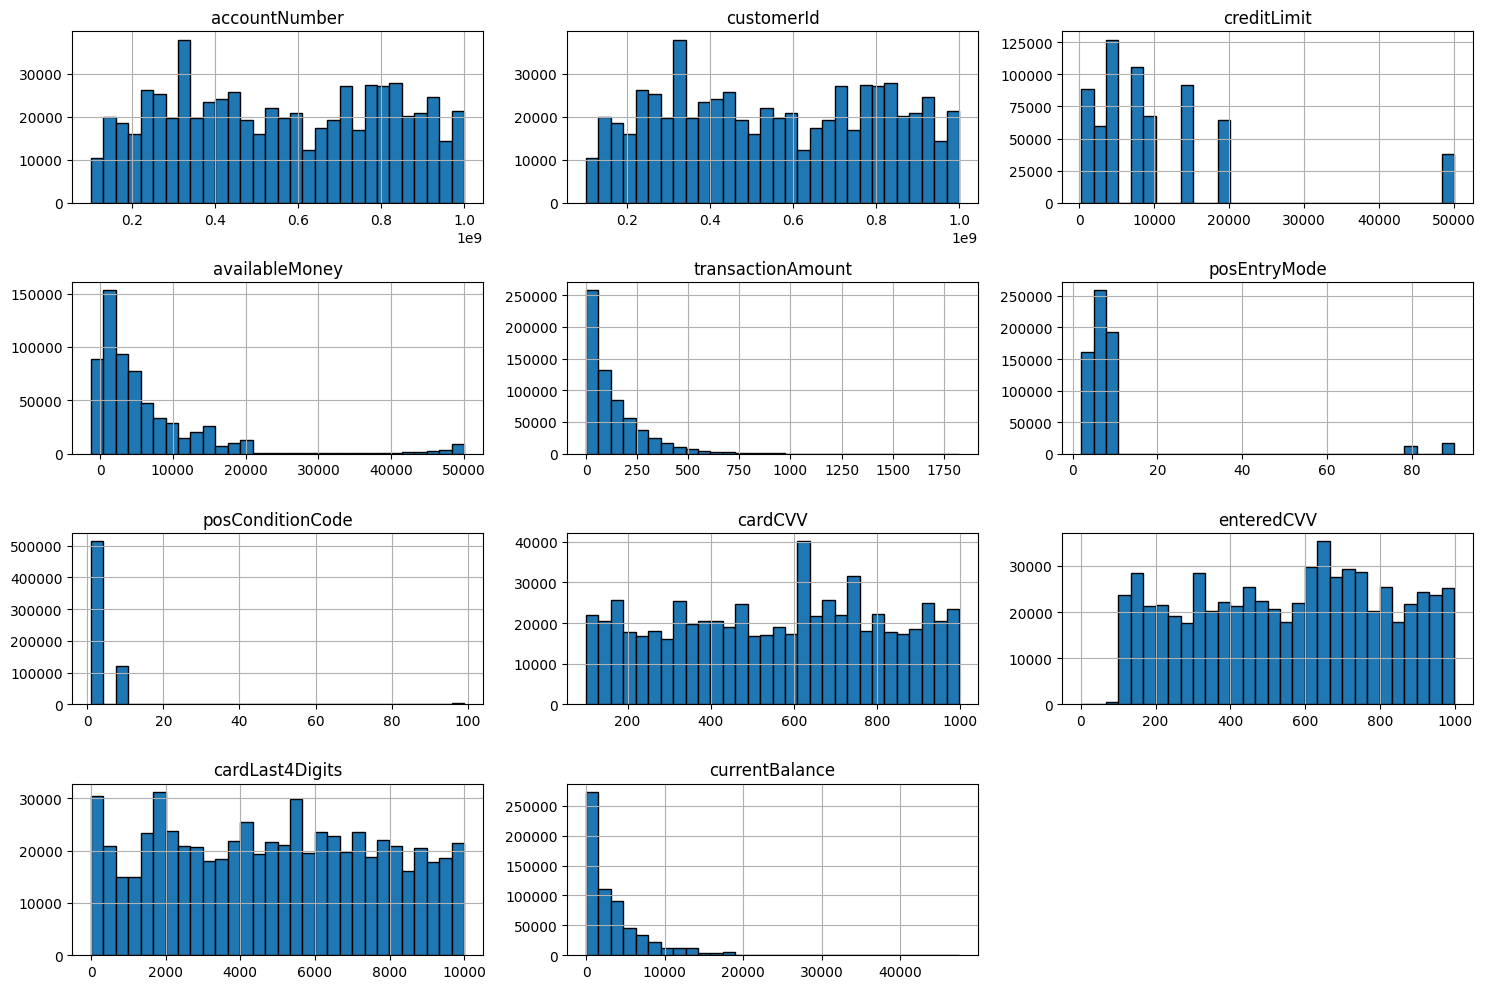

In [4]:
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

creditLimit, availableMoney, transactionAmount, currentBalance are positively skewed . So for outlier detecting using IQR or MAD is more appropriate that Z-score.
IQR = Q3 - Q1
A data point is considered an outlier if it falls below
Q1-1.5* IQR 
or above
Q3 + 1.5* IQR

In [5]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    return (df[column] < lower_bound) | (df[column] > upper_bound)

#making a copy that contains outlier columsn
df_outliers_flagged = df.copy()

#for credit limit
df_outliers_flagged['outliers_creditLimit'] = detect_outliers_iqr(df, 'creditLimit')
#for avaiableMoney
df_outliers_flagged['outliers_availableMoney'] = detect_outliers_iqr(df, 'availableMoney')
#for transactionAmount
df_outliers_flagged['outliers_transactionAmount'] = detect_outliers_iqr(df, 'transactionAmount')
#for currentBalance
df_outliers_flagged['outliers_currentBalance'] = detect_outliers_iqr(df, 'currentBalance')

#single column
df_outliers_flagged['is_outlier_any']= (
    df_outliers_flagged['outliers_creditLimit'].notna() |
    df_outliers_flagged['outliers_availableMoney'].notna() |
    df_outliers_flagged['outliers_transactionAmount'].notna() |
    df_outliers_flagged['outliers_currentBalance'].notna())

outliers_combined = df_outliers_flagged[df_outliers_flagged['is_outlier_any'] == True]

# Show result
print(outliers_combined.head())


   accountNumber  customerId  creditLimit  availableMoney  \
0      733493772   733493772         5000         5000.00   
1      733493772   733493772         5000         4888.67   
2      733493772   733493772         5000         4863.92   
3      733493772   733493772         5000         4676.52   
4      733493772   733493772         5000         4449.18   

   transactionDateTime  transactionAmount merchantName acqCountry  \
0  2016-01-08T19:04:50             111.33         Lyft         US   
1  2016-01-09T22:32:39              24.75         Uber         US   
2  2016-01-11T13:36:55             187.40         Lyft         US   
3  2016-01-11T22:47:46             227.34         Lyft         US   
4  2016-01-16T01:41:11               0.00         Lyft         US   

  merchantCountryCode  posEntryMode  ...       transactionType isFraud  \
0                  US           5.0  ...              PURCHASE    True   
1                  US           9.0  ...              PURCHASE   False

In [6]:
df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()



,creditLimit,availableMoney,transactionAmount,currentBalance
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,10697.210608,6652.828573,135.162497,4044.382035
std,11460.359133,9227.132275,147.053302,5945.510224
min,250.000000,-1244.930000,0.000000,0.000000
25%,5000.000000,1114.970000,32.320000,502.442500
50%,7500.000000,3578.165000,85.800000,2151.860000
75%,15000.000000,8169.185000,189.030000,5005.890000
max,50000.000000,50000.000000,1825.250000,47496.500000


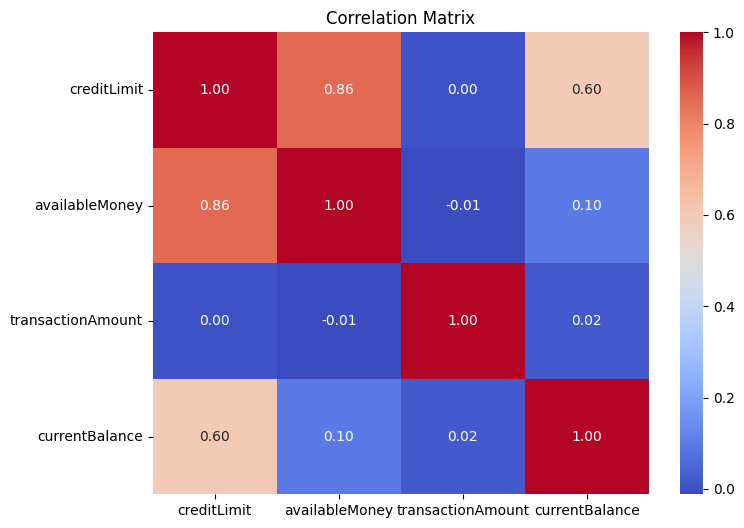

In [7]:
num_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
correlation_matrix = df[num_cols].corr()

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("Correlation Matrix")
plt.show()

In [8]:

df['accountOpenDate'].head(5)

0    3/8/2014
1    3/8/2014
2    3/8/2014
3    3/8/2014
4    3/8/2014
Name: accountOpenDate, dtype: object

In [9]:

# changing datetime columun to datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df["accountOpenDate"] = pd.to_datetime(df["accountOpenDate"], dayfirst=True)
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], dayfirst =True)
df['transactionDateTime'].dtype
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

In [10]:
df.shape

(641914, 23)

In [11]:
new_df = df.copy()

In [12]:
new_df.shape

(641914, 23)

In [13]:
new_df['txn_hour'] = new_df['transactionDateTime'].dt.hour
new_df['txn_month'] = new_df['transactionDateTime'].dt.month
new_df['txn_day'] = new_df['transactionDateTime'].dt.day

In [14]:
new_df.shape

(641914, 26)

In [15]:
# new_df.to_csv('/home/bishnu/project/EDA_transaction_data/data/processed/transactions_cleaned.csv', index=False)
new_df.to_csv('e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/cleaned_transactions.csv', index=False)